## Choosing a dataset

As with any machine learning problem, our model is only as good as the data that we train it on. Speech recognition datasets vary considerably in how they are curated and the domains that they cover. To pick the right dataset, we need to match our criteria with the features that a dataset offers.

Before we pick a dataset, we first need to understand the key defining features.

### Features of speech datasets

1. **Number of hours**

Simply put, the number of training hours indicates how large the dataset is. It’s analogous to the number of training examples in an NLP dataset. **However, bigger datasets aren’t necessarily better. If we want a model that generalises well, we want a diverse dataset with lots of different speakers, domains and speaking styles.**

2. **Domain**

The domain entails where the data was sourced from, whether it be audiobooks, podcasts, YouTube or financial meetings. Each domain has a different distribution of data. For example, audiobooks are recorded in high-quality studio conditions (with no background noise) and text that is taken from written literature. Whereas for YouTube, the audio likely contains more background noise and a more informal style of speech.

We need to match our domain to the conditions we anticipate at inference time. For instance, if we train our model on audiobooks, we can’t expect it to perform well in noisy environments.

3. **Speaking style**

The speaking style falls into one of two categories:

- Narrated: read from a script
- Spontaneous: un-scripted, conversational speech

The audio and text data reflect the style of speaking. Since narrated text is scripted, it tends to be spoken articulately and without any errors:

```
“Consider the task of training a model on a speech recognition dataset”
```

Whereas for spontaneous speech, we can expect a more colloquial style of speech, with the inclusion of repetitions, hesitations and false-starts:


```
“Let’s uhh let's take a look at how you'd go about training a model on uhm a sp- speech recognition dataset”
```

4. **Transcription style**

The transcription style refers to whether the target text has punctuation, casing or both. If we want a system to generate fully formatted text that could be used for a publication or meeting transcription, we require training data with punctuation and casing. If we just require the spoken words in an un-formatted structure, neither punctuation nor casing are necessary. In this case, we can either pick a dataset without punctuation or casing, or pick one that has punctuation and casing and then subsequently remove them from the target text through pre-processing.



### A summary of datasets on the Hub

Here is a summary of the most popular English speech recognition datasets on the Hugging Face Hub:

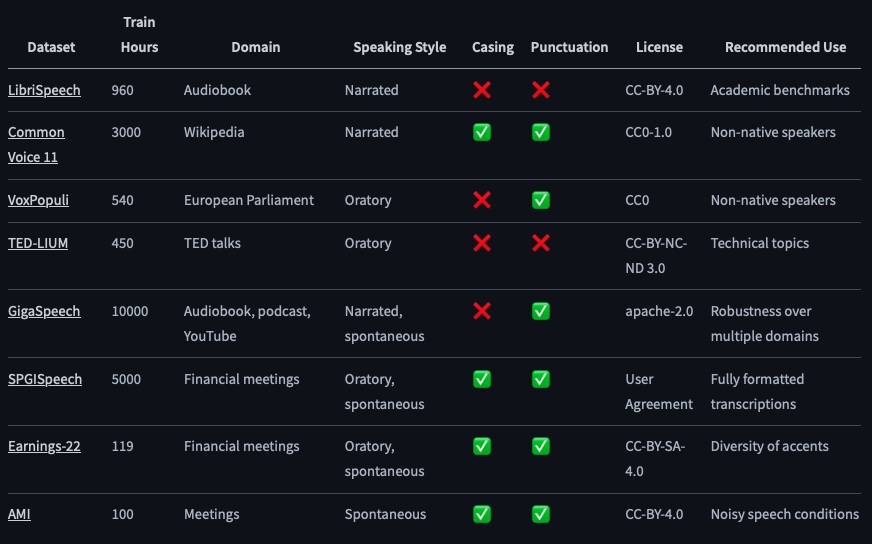

This table serves as a reference for selecting a dataset based on your criterion. Below is an equivalent table for multilingual speech recognition. Note that we omit the train hours column, since this varies depending on the language for each dataset, and replace it with the number of languages per dataset:

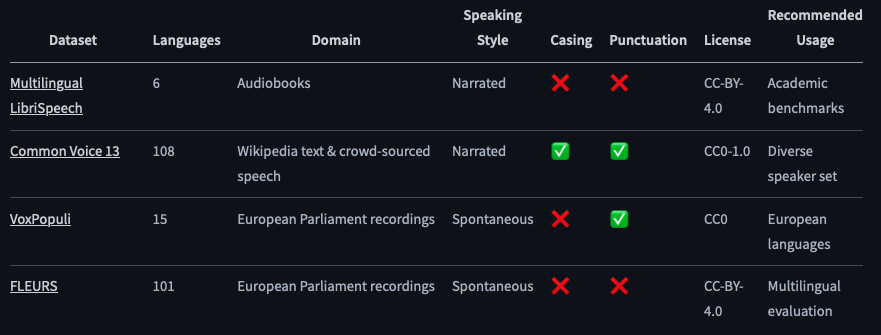

For a detailed breakdown of the audio datasets covered in both tables, refer to the blog post A Complete Guide to Audio Datasets. While there are over 180 speech recognition datasets on the Hub, it may be possible that there isn’t a dataset that matches your needs. In this case, it’s also possible to use your own audio data with 🤗 Datasets. To create a custom audio dataset, refer to the guide Create an audio dataset. When creating a custom audio dataset, consider sharing the final dataset on the Hub so that others in the community can benefit from your efforts - the audio community is inclusive and wide-ranging, and others will appreciate your work as you do theirs.

Alright! Now that we’ve gone through all the criterion for selecting an ASR dataset, let’s pick one for the purpose of this tutorial. We know that Whisper already does a pretty good job at transcribing data in high-resource languages (such as English and Spanish), so we’ll focus ourselves on low-resource multilingual transcription. We want to retain Whisper’s ability to predict punctuation and casing, so it seems from the second table that Common Voice 13 is a great candidate dataset!

### Common Voice 13

**Common Voice 13 is a crowd-sourced dataset where speakers record text from Wikipedia in various languages.** It forms part of the Common Voice series, a collection of Common Voice datasets released by Mozilla Foundation. At the time of writing, Common Voice 13 is the latest edition of the dataset, with the most languages and hours per language out of any release to date.

We can get the full list of languages for the Common Voice 13 dataset by checking-out the dataset page on the Hub: mozilla-foundation/common_voice_13_0. **The first time you view this page, you’ll be asked to accept the terms of use. After that, you’ll be given full access to the dataset.**

Once we’ve provided authentication to use the dataset, we’ll be presented with the dataset preview. The dataset preview shows us the first 100 samples of the dataset for each language. What’s more, it’s loaded up with audio samples ready for us to listen to in real time. For this Unit, we’ll select Dhivehi (or Maldivian), an Indo-Aryan language spoken in the South Asian island country of the Maldives. While we’re selecting Dhivehi for this tutorial, the steps covered here apply to any one of the 108 languages in the Common Voice 13 dataset, and more generally to any one of the 180+ audio datasets on the Hugging Face Hub, so there’s no restriction on language or dialect.

We can select the Dhivehi subset of Common Voice 13 by setting the subset to dv using the dropdown menu (dv being the language identifier code for Dhivehi):

![](https://huggingface.co/datasets/huggingface-course/audio-course-images/resolve/main/cv_13_dv_selection.png)

If we hit the play button on the first sample, we can listen to the audio and see the corresponding text. Have a scroll through the samples for the train and test sets to get a better feel for the audio and text data that we’re dealing with. You can tell from the intonation and style that the recordings are taken from narrated speech. You’ll also likely notice the large variation in speakers and recording quality, a common trait of crowd-sourced data.

The Dataset Preview is a brilliant way of experiencing audio datasets before committing to using them. You can pick any dataset on the Hub, scroll through the samples and listen to the audio for the different subsets and splits, gauging whether it’s the right dataset for your needs. Once you’ve selected a dataset, it’s trivial to load the data so that you can start using it.

Now, I personally don’t speak Dhivehi, and expect the vast majority of readers not to either! To know if our fine-tuned model is any good, we’ll need a rigorous way of evaluating it on unseen data and measuring its transcription accuracy. We’ll cover exactly this in the next section!

# Evaluation metrics for ASR

If you’re familiar with the **Levenshtein distance** from NLP, the metrics for assessing speech recognition systems will be familiar! Don’t worry if you’re not, we’ll go through the explanations start-to-finish to make sure you know the different metrics and understand what they mean.

When assessing speech recognition systems, we compare the system’s predictions to the target text transcriptions, annotating any errors that are present. We categorise these errors into one of three categories:

1. Substitutions (S): where we transcribe the wrong word in our prediction (“sit” instead of “sat”)
2. Insertions (I): where we add an extra word in our prediction
3. Deletions (D): where we remove a word in our prediction

These error categories are the same for all speech recognition metrics. What differs is the level at which we compute these errors: we can either compute them on the word level or on the character level.

We’ll use a running example for each of the metric definitions. Here, we have a ground truth or reference text sequence:



In [1]:
reference = "the cat sat on the mat"


And a predicted sequence from the speech recognition system that we’re trying to assess:

In [2]:
prediction = "the cat sit on the"

We can see that the prediction is pretty close, but some words are not quite right. We’ll evaluate this prediction against the reference for the three most popular speech recognition metrics and see what sort of numbers we get for each.

### Word Error Rate

The word error rate (WER) metric is the ‘de facto’ metric for speech recognition. It calculates substitutions, insertions and deletions on the word level. This means errors are annotated on a word-by-word basis. Take our example:

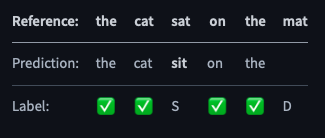

Here, we have:

- 1 substitution (“sit” instead of “sat”)
- 0 insertions
- 1 deletion (“mat” is missing)

This gives 2 errors in total. To get our error rate, we divide the number of errors by the total number of words in our reference (N), which for this example is 6:

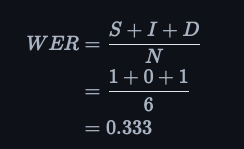

Alright! So we have a WER of 0.333, or 33.3%. Notice how the word “sit” only has one character that is wrong, but the entire word is marked incorrect. This is a defining feature of the WER: spelling errors are penalised heavily, no matter how minor they are.

The WER is defined such that lower is better: a lower WER means there are fewer errors in our prediction, so a perfect speech recognition system would have a WER of zero (no errors).

Let’s see how we can compute the WER using 🤗 Evaluate. We’ll need two packages to compute our WER metric: 🤗 Evaluate for the API interface, and JIWER to do the heavy lifting of running the calculation:

In [3]:
!pip install -q --upgrade evaluate jiwer


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip


Great! We can now load up the WER metric and compute the figure for our example:



In [4]:
from evaluate import load

wer_metric = load("wer")

wer = wer_metric.compute(references=[reference], predictions=[prediction])

print(wer)

0.3333333333333333


0.33, or 33.3%, as expected! We now know what’s going on under-the-hood with this WER calculation.

Now, here’s something that’s quite confusing… What do you think the upper limit of the WER is? You would expect it to be 1 or 100% right? Nuh uh! Since the WER is the ratio of errors to number of words (N), there is no upper limit on the WER! Let’s take an example were we predict 10 words and the target only has 2 words. If all of our predictions were wrong (10 errors), we’d have a WER of 10 / 2 = 5, or 500%! This is something to bear in mind if you train an ASR system and see a WER of over 100%. Although if you’re seeing this, something has likely gone wrong… 😅

### Word Accuracy

We can flip the WER around to give us a metric where higher is better. **Rather than measuring the word error rate, we can measure the word accuracy (WAcc) of our system:**

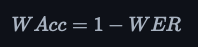

The WAcc is also measured on the word-level, it’s just the WER reformulated as an accuracy metric rather than an error metric. The WAcc is very infrequently quoted in the speech literature - we think of our system predictions in terms of word errors, and so prefer error rate metrics that are more associated with these error type annotations.



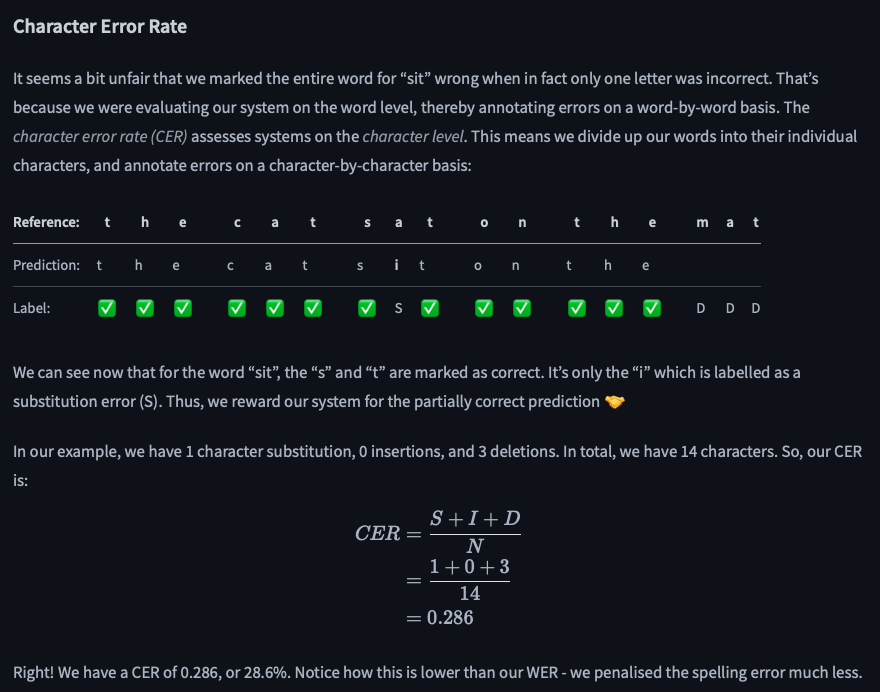

### Which metric should I use?

In general, the **WER is used far more than the CER** for assessing speech systems. This is because the WER requires systems to have greater understanding of the context of the predictions. In our example, “sit” is in the wrong tense. A system that understands the relationship between the verb and tense of the sentence would have predicted the correct verb tense of “sat”. We want to encourage this level of understanding from our speech systems. So although the WER is less forgiving than the CER, it’s also more conducive to the kinds of intelligible systems we want to develop. Therefore, we typically use the WER and would encourage you to as well! However, there are circumstances where it is not possible to use the WER. Certain languages, such as Mandarin and Japanese, have no notion of ‘words’, and so the WER is meaningless. Here, we revert to using the CER.

In our example, we only used one sentence when computing the WER. We would typically use an entire test set consisting of several thousand sentences when evaluating a real system. When evaluating over multiple sentences, we aggregate S, I, D and N across all sentences, and then compute the WER according to the formula defined above. This gives a better estimate of the WER for unseen data.

### Normalisation

If we train an ASR model on data with punctuation and casing, it will learn to predict casing and punctuation in its transcriptions. This is great when we want to use our model for actual speech recognition applications, such as transcribing meetings or dictation, since the predicted transcriptions will be fully formatted with casing and punctuation, a style referred to as orthographic.

However, we also have the option of normalising the dataset to remove any casing and punctuation. Normalising the dataset makes the speech recognition task easier: the model no longer needs to distinguish between upper and lower case characters, or have to predict punctuation from the audio data alone (e.g. what sound does a semi-colon make?). Because of this, the word error rates are naturally lower (meaning the results are better). The Whisper paper demonstrates the drastic effect that normalising transcriptions can have on WER results (c.f. Section 4.4 of the Whisper paper). While we get lower WERs, the model isn’t necessarily better for production. The lack of casing and punctuation makes the predicted text from the model significantly harder to read. Take the example from the previous section, where we ran Wav2Vec2 and Whisper on the same audio sample from the LibriSpeech dataset. The Wav2Vec2 model predicts neither punctuation nor casing, whereas Whisper predicts both. Comparing the transcriptions side-by-side, we see that the Whisper transcription is far easier to read:

```
Wav2Vec2:  HE TELLS US THAT AT THIS FESTIVE SEASON OF THE YEAR WITH CHRISTMAUS AND ROSE BEEF LOOMING BEFORE US SIMALYIS DRAWN FROM EATING AND ITS RESULTS OCCUR MOST READILY TO THE MIND
Whisper:   He tells us that at this festive season of the year, with Christmas and roast beef looming before us, similarly is drawn from eating and its results occur most readily to the mind.
```

The Whisper transcription is orthographic and thus ready to go - it’s formatted as we’d expect for a meeting transcription or dictation script with both punctuation and casing. On the contrary, we would need to use additional post-processing to restore punctuation and casing in our Wav2Vec2 predictions if we wanted to use it for downstream applications.

There is a happy medium between normalising and not normalising: we can train our systems on orthographic transcriptions, and then normalise the predictions and targets before computing the WER. This way, we train our systems to predict fully formatted text, but also benefit from the WER improvements we get by normalising the transcriptions.

The Whisper model was released with a normaliser that effectively handles the normalisation of casing, punctuation and number formatting among others. Let’s apply the normaliser to the Whisper transcriptions to demonstrate how we can normalise them:

In [6]:
!pip install -q transformers


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip


In [7]:
from transformers.models.whisper.english_normalizer import BasicTextNormalizer

normalizer = BasicTextNormalizer()

prediction = " He tells us that at this festive season of the year, with Christmas and roast beef looming before us, similarly is drawn from eating and its results occur most readily to the mind."
normalized_prediction = normalizer(prediction)

normalized_prediction

' he tells us that at this festive season of the year with christmas and roast beef looming before us similarly is drawn from eating and its results occur most readily to the mind '

Great! We can see that the text has been fully lower-cased and all punctuation removed. Let’s now define the reference transcription and then compute the normalised WER between the reference and prediction:



In [8]:
reference = "HE TELLS US THAT AT THIS FESTIVE SEASON OF THE YEAR WITH CHRISTMAS AND ROAST BEEF LOOMING BEFORE US SIMILES DRAWN FROM EATING AND ITS RESULTS OCCUR MOST READILY TO THE MIND"
normalized_referece = normalizer(reference)

wer = wer_metric.compute(
    references=[normalized_referece], predictions=[normalized_prediction]
)
wer

0.0625

6.25% - that’s about what we’d expect for the Whisper base model on the LibriSpeech validation set. As we see here, we’ve predicted an orthographic transcription, but benefited from the WER boost obtained by normalising the reference and prediction prior to computing the WER.

The choice of how you normalise the transcriptions is ultimately down to your needs. We recommend training on orthographic text and evaluating on normalised text to get the best of both worlds.

### Putting it all together

Alright! We’ve covered three topics so far in this Unit: pre-trained models, dataset selection and evaluation. Let’s have some fun and put them together in one end-to-end example 🚀 We’re going to set ourselves up for the next section on fine-tuning by evaluating the pre-trained Whisper model on the Common Voice 13 Dhivehi test set. We’ll use the WER number we get as a baseline for our fine-tuning run, or a target number that we’ll try and beat 🥊

First, we’ll load the pre-trained Whisper model using the pipeline() class. This process will be extremely familiar by now! The only new thing we’ll do is load the model in half-precision (float16) if running on a GPU - this will speed up inference at almost no cost to WER accuracy.

In [9]:
from transformers import pipeline
import torch

if torch.cuda.is_available():
    device = "cuda:0"
    torch_dtype = torch.float16
else:
    device = "cpu"
    torch_dtype = torch.float32

pipe = pipeline(
    "automatic-speech-recognition",
    model="openai/whisper-small",
    torch_dtype=torch_dtype,
    device=device,
)

config.json:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.87k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

Next, we’ll load the Dhivehi test split of Common Voice 13. You’ll remember from the previous section that the Common Voice 13 is gated, meaning we had to agree to the dataset terms of use before gaining access to the dataset. We can now link our Hugging Face account to our notebook, so that we have access to the dataset from the machine we’re currently using.

Linking the notebook to the Hub is straightforward - it simply requires entering your Hub authentication token when prompted.

In [14]:
from huggingface_hub import login

login()

Great! Once we’ve linked the notebook to our Hugging Face account, we can proceed with downloading the Common Voice dataset. This will take a few minutes to download and pre-process, fetching the data from the Hugging Face Hub and preparing it automatically on your notebook:



install this to fix:

````
!pip install -q soundfile
```

In [15]:
from datasets import load_dataset

common_voice_test = load_dataset(
    "mozilla-foundation/common_voice_13_0", "dv", split="test"
)

Generating train split: 0 examples [00:00, ? examples/s]


Reading metadata...: 2677it [00:00, 101845.42it/s]


DatasetGenerationError: An error occurred while generating the dataset

Evaluating over an entire dataset can be done in much the same way as over a single example - all we have to do is loop over the input audios, rather than inferring just a single sample. To do this, we first transform our dataset into a KeyDataset. All this does is pick out the particular dataset column that we want to forward to the model (in our case, that’s the "audio" column), ignoring the rest (like the target transcriptions, which we don’t want to use for inference). We then iterate over this transformed datasets, appending the model outputs to a list to save the predictions. The following code cell will take approximately five minutes if running on a GPU with half-precision, peaking at 12GB memory:

In [ ]:
from tqdm import tqdm
from transformers.pipelines.pt_utils import KeyDataset

all_predictions = []

# run streamed inference
for prediction in tqdm(
    pipe(
        KeyDataset(common_voice_test, "audio"),
        max_new_tokens=128,
        generate_kwargs={"task": "transcribe"},
        batch_size=8, # original 32
    ),
    total=len(common_voice_test),
):
    all_predictions.append(prediction["text"])

> If you experience a CUDA out-of-memory (OOM) when running the above cell, incrementally reduce the `batch_size` by factors of 2 until you find a batch size that fits your device.

And finally, we can compute the WER. Let’s first compute the orthographic WER, i.e. the WER without any post-processing:

In [ ]:
from evaluate import load

wer_metric = load("wer")

wer_ortho = 100 * wer_metric.compute(
    references=common_voice_test["sentence"], predictions=all_predictions
)
wer_ortho

Okay… 167% essentially means our model is outputting garbage 😜 Not to worry, it’ll be our aim to improve this by fine-tuning the model on the Dhivehi training set!

Next, we’ll evaluate the normalised WER, i.e. the WER with normalisation post-processing. We have to filter out samples that would be empty after normalisation, as otherwise the total number of words in our reference (N) would be zero, which would give a division by zero error in our calculation:

In [ ]:
from transformers.models.whisper.english_normalizer import BasicTextNormalizer

normalizer = BasicTextNormalizer()

# compute normalised WER
all_predictions_norm = [normalizer(pred) for pred in all_predictions]
all_references_norm = [normalizer(label) for label in common_voice_test["sentence"]]

# filtering step to only evaluate the samples that correspond to non-zero references
all_predictions_norm = [
    all_predictions_norm[i]
    for i in range(len(all_predictions_norm))
    if len(all_references_norm[i]) > 0
]
all_references_norm = [
    all_references_norm[i]
    for i in range(len(all_references_norm))
    if len(all_references_norm[i]) > 0
]

wer = 100 * wer_metric.compute(
    references=all_references_norm, predictions=all_predictions_norm
)

wer

Again we see the drastic reduction in WER we achieve by normalising our references and predictions: the baseline model achieves an orthographic test WER of 168%, while the normalised WER is 126%.

Right then! These are the numbers that we want to try and beat when we fine-tune the model, in order to improve the Whisper model for Dhivehi speech recognition. Continue reading to get hands-on with a fine-tuning example 🚀